In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


# Date and Time Data Types and Tools

In [2]:
from datetime import datetime

In [3]:
now=datetime.now()
now

datetime.datetime(2021, 3, 20, 13, 8, 22, 468525)

In [4]:
now.year, now.month, now.day

(2021, 3, 20)

In [5]:
delta=datetime(2021,3,14,16,9)-datetime(2015,1,23)

In [6]:
delta

datetime.timedelta(2242, 58140)

In [7]:
delta.days, delta.seconds

(2242, 58140)

In [8]:
from datetime import timedelta
start=datetime(2011,1,22)
start+ timedelta(12)

datetime.datetime(2011, 2, 3, 0, 0)

In [9]:
start-2*timedelta(12)

datetime.datetime(2010, 12, 29, 0, 0)

In [10]:
datetime.date(now)
datetime.time(now)

datetime.time(13, 8, 22, 468525)

### Converting between string and datetime

In [11]:
stamp=datetime(2011,1,3)
print(str(stamp))
stamp.strftime('%Y-%m-%d')

2011-01-03 00:00:00


'2011-01-03'

In [12]:
value='2011-01-03'
datetime.strptime(value,'%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [13]:
datestrs=['7/6/2011','8/6/2011']
[datetime.strptime(x,'%d/%m/%Y') for x in datestrs]

[datetime.datetime(2011, 6, 7, 0, 0), datetime.datetime(2011, 6, 8, 0, 0)]

In [14]:
from dateutil.parser import parse
parse('2011-01-03') #only use for the common date format, won't work everywhere


datetime.datetime(2011, 1, 3, 0, 0)

In [15]:
parse('6/7/2011')  #6 was meant to be date but it doesn't recognize therefore we should use dayfirst

datetime.datetime(2011, 6, 7, 0, 0)

In [16]:
parse('6/7/2011', dayfirst=True) # Indicate which one is date

datetime.datetime(2011, 7, 6, 0, 0)

In [17]:
# dateutil is capable of parsing most human-intelligible date representation
parse('Jan 31, 1997, 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [18]:
datestrs=['2011-07-06 12:00:00','2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [19]:
idx=pd.to_datetime(datestrs+[None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [20]:
idx[2] #Not a time

NaT

In [21]:
pd.isnull(idx)

array([False, False,  True])

# Time Series Basics

In [22]:
from datetime import datetime

In [23]:
dates=[datetime(2011,1,2),datetime(2011,1,5),datetime(2011,1,7),datetime(2011,1,8),datetime(2011,1,10),datetime(2011,1,12)]

In [24]:
ts=pd.Series(np.random.randn(6),index=dates)

In [25]:
print(ts)

2011-01-02   -0.295390
2011-01-05   -0.008867
2011-01-07   -0.093610
2011-01-08    1.735841
2011-01-10    2.486401
2011-01-12   -0.950333
dtype: float64


In [26]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [27]:
ts+ts[::2] # Indexes are automatically to their dates

2011-01-02   -0.590780
2011-01-05         NaN
2011-01-07   -0.187219
2011-01-08         NaN
2011-01-10    4.972803
2011-01-12         NaN
dtype: float64

In [28]:
ts.index.dtype

dtype('<M8[ns]')

In [29]:
stamp=ts.index[0]
stamp # pandas timestamp object

Timestamp('2011-01-02 00:00:00')

### Indexing, selection and subsetting

In [30]:
stamp=ts.index[2]
ts[stamp]

-0.09360959163075261

In [31]:
ts['1/10/2011'] # you can pass a string that is interpretable as a string

2.4864013381394834

In [32]:
ts['20110110']

2.4864013381394834

In [33]:
longer_ts=pd.Series(np.random.randn(1000),index=pd.date_range('1/1/2000', periods=(1000)))

In [34]:
longer_ts.head()

2000-01-01   -0.031988
2000-01-02   -0.536578
2000-01-03    0.623471
2000-01-04    1.904177
2000-01-05    1.522569
Freq: D, dtype: float64

In [35]:
longer_ts['2001'].head()

2001-01-01    1.316074
2001-01-02    0.770957
2001-01-03    0.236745
2001-01-04   -1.765629
2001-01-05    1.114139
Freq: D, dtype: float64

In [36]:
longer_ts['2001-05'].head()

2001-05-01   -1.715842
2001-05-02    0.029242
2001-05-03    1.682275
2001-05-04   -0.234247
2001-05-05    0.531156
Freq: D, dtype: float64

In [37]:
ts[datetime(2011,1,7)]

-0.09360959163075261

In [38]:
ts

2011-01-02   -0.295390
2011-01-05   -0.008867
2011-01-07   -0.093610
2011-01-08    1.735841
2011-01-10    2.486401
2011-01-12   -0.950333
dtype: float64

In [39]:
ts['1/6/2011':'1/11/2011'] # slice with timestamp not contain in time series

2011-01-07   -0.093610
2011-01-08    1.735841
2011-01-10    2.486401
dtype: float64

In [40]:
ts.truncate(after=('1/9/2011'))

2011-01-02   -0.295390
2011-01-05   -0.008867
2011-01-07   -0.093610
2011-01-08    1.735841
dtype: float64

In [41]:
dates=pd.date_range('1/1/2000',periods=100,freq='W-WED')
long_df=pd.DataFrame(np.random.randn(100,4),index=dates,columns=['Tia','Leh','Shey','Stok'])
long_df.head()

,Tia,Leh,Shey,Stok
2000-01-05,0.831466,0.748963,-1.088523,-0.969076
2000-01-12,-1.528864,0.280420,1.761391,-0.523842
2000-01-19,-0.367356,0.262967,0.928625,0.980050
2000-01-26,0.081103,-0.165741,-0.101085,0.529745
2000-02-02,-1.242142,1.429476,-1.033005,-0.295315


In [42]:
long_df.loc['5-2001']

,Tia,Leh,Shey,Stok
2001-05-02,-1.713939,-0.903653,-0.918776,0.455631
2001-05-09,-0.635844,-1.195988,-1.936170,0.286349
2001-05-16,0.711686,-0.791275,-2.509688,-0.409223
2001-05-23,-1.505525,-0.166674,-2.149898,0.754493
2001-05-30,1.677731,1.325388,0.452941,1.801487


### Time Series and duplicate indices

In [43]:
dates=['1/1/2020','1/2/2020','1/2/2020','1/2/2020','1/3/2020']
dup=pd.Series(np.random.randn(5),index=dates)
dup

1/1/2020   -0.615858
1/2/2020   -0.071329
1/2/2020    0.493101
1/2/2020    0.191936
1/3/2020    0.663245
dtype: float64

In [44]:
dup['1/1/2020'],dup['1/2/2020']

(-0.6158579607502366,
 1/2/2020   -0.071329
 1/2/2020    0.493101
 1/2/2020    0.191936
 dtype: float64)

In [45]:
dup.index.is_unique

False

In [46]:
dup.groupby(level=0).mean()

1/1/2020   -0.615858
1/2/2020    0.204569
1/3/2020    0.663245
dtype: float64

In [47]:
dup.groupby(level=0).count()

1/1/2020    1
1/2/2020    3
1/3/2020    1
dtype: int64

# Date ranges, frequencies and shifting

In [48]:
ts

2011-01-02   -0.295390
2011-01-05   -0.008867
2011-01-07   -0.093610
2011-01-08    1.735841
2011-01-10    2.486401
2011-01-12   -0.950333
dtype: float64

In [49]:
resampler=ts.resample('D')

In [50]:
resampler.mean()

2011-01-02   -0.295390
2011-01-03         NaN
2011-01-04         NaN
2011-01-05   -0.008867
2011-01-06         NaN
2011-01-07   -0.093610
2011-01-08    1.735841
2011-01-09         NaN
2011-01-10    2.486401
2011-01-11         NaN
2011-01-12   -0.950333
Freq: D, dtype: float64

### Generating data ranges

In [51]:
index=pd.date_range('2012-04-01','2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [52]:
pd.date_range('2012-04-01',periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [53]:
pd.date_range('2000-01-01','2000-12-01',freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [54]:
pd.date_range('2012-05-02 12:56:31',periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [55]:
pd.date_range('2012-05-02 13:56:31',periods=5,normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequencies and data offsets

In [56]:
from pandas.tseries.offsets import Hour, Minute
hour=Hour()
hour

<Hour>

In [57]:
four_hour=Hour(4)
four_hour

<4 * Hours>

In [58]:
pd.date_range('2000-01-01','2000-01-03 23:59', freq='4H')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [59]:
Hour(2)+Minute(30)

<150 * Minutes>

In [60]:
pd.date_range('2000-01-01',periods=10,freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [61]:
rng=pd.date_range('2000-01-01','2000-09-01',freq='WOM-3FRI')
list(rng)

[Timestamp('2000-01-21 00:00:00', freq='WOM-3FRI'),
 Timestamp('2000-02-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2000-03-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2000-04-21 00:00:00', freq='WOM-3FRI'),
 Timestamp('2000-05-19 00:00:00', freq='WOM-3FRI'),
 Timestamp('2000-06-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2000-07-21 00:00:00', freq='WOM-3FRI'),
 Timestamp('2000-08-18 00:00:00', freq='WOM-3FRI')]

### Shifting(Leading and Lagging) Data

In [62]:
ts=pd.Series(np.random.randn(4),index=pd.date_range('1/1/2020',periods=4,freq='M'))

In [63]:
ts

2020-01-31   -0.015207
2020-02-29    1.180557
2020-03-31   -0.700544
2020-04-30    1.156975
Freq: M, dtype: float64

In [64]:
ts.shift(2)

2020-01-31         NaN
2020-02-29         NaN
2020-03-31   -0.015207
2020-04-30    1.180557
Freq: M, dtype: float64

In [65]:
ts.shift(-2)

2020-01-31   -0.700544
2020-02-29    1.156975
2020-03-31         NaN
2020-04-30         NaN
Freq: M, dtype: float64

In [66]:
ts.shift(1)

2020-01-31         NaN
2020-02-29   -0.015207
2020-03-31    1.180557
2020-04-30   -0.700544
Freq: M, dtype: float64

In [67]:
ts/ts.shift(1)-1

2020-01-31          NaN
2020-02-29   -78.631883
2020-03-31    -1.593401
2020-04-30    -2.651538
Freq: M, dtype: float64

In [68]:
ts.shift(2,freq='M')

2020-03-31   -0.015207
2020-04-30    1.180557
2020-05-31   -0.700544
2020-06-30    1.156975
Freq: M, dtype: float64

In [69]:
ts.shift(3,freq='D')

2020-02-03   -0.015207
2020-03-03    1.180557
2020-04-03   -0.700544
2020-05-03    1.156975
dtype: float64

In [70]:
ts.shift(1,freq='90T')

2020-01-31 01:30:00   -0.015207
2020-02-29 01:30:00    1.180557
2020-03-31 01:30:00   -0.700544
2020-04-30 01:30:00    1.156975
dtype: float64

#### shift dates with offset

In [71]:
from pandas.tseries.offsets import Day, MonthEnd

In [72]:
now=datetime(2011,11,17)

In [73]:
now+3*Day()

Timestamp('2011-11-20 00:00:00')

In [74]:
now+MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [75]:
now+MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [76]:
offset=MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [77]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [78]:
ts=pd.Series(np.random.randn(20),index=pd.date_range('1/15/2000',periods=20,freq='4d'))
ts

2000-01-15    0.748096
2000-01-19    0.209375
2000-01-23    0.351627
2000-01-27   -0.228525
2000-01-31    1.243136
2000-02-04    0.453123
2000-02-08    1.460888
2000-02-12   -1.634582
2000-02-16   -0.358451
2000-02-20   -0.895333
2000-02-24   -0.364627
2000-02-28    0.786169
2000-03-03   -0.791776
2000-03-07    2.313658
2000-03-11    1.080519
2000-03-15    0.507324
2000-03-19   -0.455416
2000-03-23    2.773175
2000-03-27   -2.021340
2000-03-31    0.016553
Freq: 4D, dtype: float64

In [79]:
ts.groupby(offset.rollforward).mean()

2000-01-31    0.464742
2000-02-29   -0.078973
2000-03-31    0.427837
dtype: float64

In [80]:
ts.resample('M').mean()

2000-01-31    0.464742
2000-02-29   -0.078973
2000-03-31    0.427837
Freq: M, dtype: float64

# Time zone handling

In [81]:
import pytz

In [82]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [83]:
tz=pytz.timezone('Asia/Kolkata')
tz

<DstTzInfo 'Asia/Kolkata' LMT+5:53:00 STD>

### Time zone localization and conversion


In [84]:
rng=pd.date_range('3/9/2012 9:30',periods=6,freq='D')

In [85]:
ts=pd.Series(np.random.randn(len(rng)),index=rng)
ts

2012-03-09 09:30:00   -0.069394
2012-03-10 09:30:00   -0.779807
2012-03-11 09:30:00    1.259021
2012-03-12 09:30:00    1.559714
2012-03-13 09:30:00   -0.411562
2012-03-14 09:30:00   -0.175515
Freq: D, dtype: float64

In [86]:
print(ts.index.tz)

None


In [87]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='Asia/Kolkata')

DatetimeIndex(['2012-03-09 09:30:00+05:30', '2012-03-10 09:30:00+05:30',
               '2012-03-11 09:30:00+05:30', '2012-03-12 09:30:00+05:30',
               '2012-03-13 09:30:00+05:30', '2012-03-14 09:30:00+05:30',
               '2012-03-15 09:30:00+05:30', '2012-03-16 09:30:00+05:30',
               '2012-03-17 09:30:00+05:30', '2012-03-18 09:30:00+05:30'],
              dtype='datetime64[ns, Asia/Kolkata]', freq='D')

In [88]:
ts

2012-03-09 09:30:00   -0.069394
2012-03-10 09:30:00   -0.779807
2012-03-11 09:30:00    1.259021
2012-03-12 09:30:00    1.559714
2012-03-13 09:30:00   -0.411562
2012-03-14 09:30:00   -0.175515
Freq: D, dtype: float64

In [89]:
ts_utc=ts.tz_localize('Asia/Kolkata')

In [90]:
ts_utc

2012-03-09 09:30:00+05:30   -0.069394
2012-03-10 09:30:00+05:30   -0.779807
2012-03-11 09:30:00+05:30    1.259021
2012-03-12 09:30:00+05:30    1.559714
2012-03-13 09:30:00+05:30   -0.411562
2012-03-14 09:30:00+05:30   -0.175515
dtype: float64

In [91]:
ts_utc.index


DatetimeIndex(['2012-03-09 09:30:00+05:30', '2012-03-10 09:30:00+05:30',
               '2012-03-11 09:30:00+05:30', '2012-03-12 09:30:00+05:30',
               '2012-03-13 09:30:00+05:30', '2012-03-14 09:30:00+05:30'],
              dtype='datetime64[ns, Asia/Kolkata]', freq=None)

In [92]:
ts_utc.tz_convert('UTC')

2012-03-09 04:00:00+00:00   -0.069394
2012-03-10 04:00:00+00:00   -0.779807
2012-03-11 04:00:00+00:00    1.259021
2012-03-12 04:00:00+00:00    1.559714
2012-03-13 04:00:00+00:00   -0.411562
2012-03-14 04:00:00+00:00   -0.175515
dtype: float64

In [93]:
ts_utc.tz_convert('Europe/Berlin')

2012-03-09 05:00:00+01:00   -0.069394
2012-03-10 05:00:00+01:00   -0.779807
2012-03-11 05:00:00+01:00    1.259021
2012-03-12 05:00:00+01:00    1.559714
2012-03-13 05:00:00+01:00   -0.411562
2012-03-14 05:00:00+01:00   -0.175515
dtype: float64

### Operation with time zone--Aware Timestamp object

In [94]:
stamp=pd.Timestamp('2011-03-12 04:00')
stamp_utc=stamp.tz_localize('utc')

In [95]:
stamp_utc.tz_convert('America/New_york')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [96]:
stamp_moscow=pd.Timestamp('2011-03-12 04:00',tz='Europe/moscow')

In [97]:
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [98]:
stamp_utc.value

1299902400000000000

In [99]:
stamp_utc.tz_convert('Asia/Kolkata').value

1299902400000000000

### Operation between different time zones

In [100]:
rng=pd.date_range('3/7/2012 9:30', periods=10,freq='B')
ts=pd.Series(np.random.randn(len(rng)),index=rng)
ts

2012-03-07 09:30:00   -1.643844
2012-03-08 09:30:00    0.308410
2012-03-09 09:30:00    1.308442
2012-03-12 09:30:00   -1.274144
2012-03-13 09:30:00   -0.194563
2012-03-14 09:30:00    0.600001
2012-03-15 09:30:00    0.372034
2012-03-16 09:30:00   -0.187329
2012-03-19 09:30:00   -1.213160
2012-03-20 09:30:00    0.085352
Freq: B, dtype: float64

In [101]:
ts1=ts[:7].tz_localize('Europe/London')
ts1

2012-03-07 09:30:00+00:00   -1.643844
2012-03-08 09:30:00+00:00    0.308410
2012-03-09 09:30:00+00:00    1.308442
2012-03-12 09:30:00+00:00   -1.274144
2012-03-13 09:30:00+00:00   -0.194563
2012-03-14 09:30:00+00:00    0.600001
2012-03-15 09:30:00+00:00    0.372034
dtype: float64

In [102]:
ts2=ts1[2:].tz_convert('Europe/Moscow')
ts2

2012-03-09 13:30:00+04:00    1.308442
2012-03-12 13:30:00+04:00   -1.274144
2012-03-13 13:30:00+04:00   -0.194563
2012-03-14 13:30:00+04:00    0.600001
2012-03-15 13:30:00+04:00    0.372034
dtype: float64

In [103]:
result=ts1+ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

# Periods and period Arithmetic

In [104]:
p=pd.Period(2007,freq='A-DEC')

In [105]:
p

Period('2007', 'A-DEC')

In [106]:
p+5

Period('2012', 'A-DEC')

In [107]:
p-2

Period('2005', 'A-DEC')

In [108]:
pd.Period('2014',freq='A-DEC')-p

<7 * YearEnds: month=12>

In [109]:
rng=pd.period_range('2000-01-01','2000-06-30',freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [110]:
pd.Series(np.random.randn(6),index=rng)

2000-01    1.793086
2000-02   -1.776189
2000-03   -0.789184
2000-04    1.601093
2000-05   -0.870003
2000-06    0.446870
Freq: M, dtype: float64

In [111]:
values=['2001Q3','2001Q2','2001Q1']
index=pd.PeriodIndex(values,freq='Q-DEC')

In [112]:
index

PeriodIndex(['2001Q3', '2001Q2', '2001Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### Period frequency conversion

In [113]:
p=pd.Period('2007',freq='A-DEC')
p

Period('2007', 'A-DEC')

In [114]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [115]:
p.asfreq('M',how='end')

Period('2007-12', 'M')

In [116]:
p=pd.Period('Aug-2007','M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [117]:
rng=pd.period_range('2006','2009',freq='A-DEC')
ts=pd.Series(np.random.randn(len(rng)),index=rng)
ts

2006   -2.641271
2007    0.134420
2008   -1.057829
2009   -1.200497
Freq: A-DEC, dtype: float64

In [118]:
ts.asfreq('M',how='start')

2006-01   -2.641271
2007-01    0.134420
2008-01   -1.057829
2009-01   -1.200497
Freq: M, dtype: float64

In [119]:
ts.asfreq('B', how='end')

2006-12-29   -2.641271
2007-12-31    0.134420
2008-12-31   -1.057829
2009-12-31   -1.200497
Freq: B, dtype: float64

### Quarterly period frquencies

In [120]:
p=pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [121]:
p.asfreq('D','start')

Period('2011-11-01', 'D')

In [122]:
p.asfreq('D','end')

Period('2012-01-31', 'D')

In [123]:
p4pm=(p.asfreq('B','e')-1).asfreq('T','s')+16*60

In [124]:
p4pm

Period('2012-01-30 16:00', 'T')

In [125]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [126]:
rng=pd.period_range('2011Q3','2012Q4',freq='Q-JAN')
ts=pd.Series(np.arange(len(rng)),index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [127]:
new_rng=(rng.asfreq('B','e')-1).asfreq('T','s')+16*60
ts.index=new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

### Converting timestamp to period and back

In [128]:
rng=pd.date_range('2000-01-01',periods=3,freq='M')
ts=pd.Series(np.random.randn(3),index=rng)
ts

2000-01-31   -0.373026
2000-02-29    0.815062
2000-03-31   -1.145398
Freq: M, dtype: float64

In [129]:
pts=ts.to_period()
pts

2000-01   -0.373026
2000-02    0.815062
2000-03   -1.145398
Freq: M, dtype: float64

In [130]:
rng=pd.date_range('1/29/2000',periods=6,freq='D')
ts2=pd.Series(np.random.randn(6),index=rng)

In [131]:
ts2.to_period('M')

2000-01    0.877199
2000-01    1.343256
2000-01    0.638359
2000-02    0.091009
2000-02    0.992817
2000-02   -1.962751
Freq: M, dtype: float64

In [132]:
pts=ts2.to_period()
pts

2000-01-29    0.877199
2000-01-30    1.343256
2000-01-31    0.638359
2000-02-01    0.091009
2000-02-02    0.992817
2000-02-03   -1.962751
Freq: D, dtype: float64

In [133]:
pts.to_timestamp()

2000-01-29    0.877199
2000-01-30    1.343256
2000-01-31    0.638359
2000-02-01    0.091009
2000-02-02    0.992817
2000-02-03   -1.962751
Freq: D, dtype: float64

### Creating a periodIndex from array

In [134]:
data=pd.read_csv('H:\data structure program\python_for_everybody\\macrodata.csv')
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [135]:
data.year.head(5)

0    1959.0
1    1959.0
2    1959.0
3    1959.0
4    1960.0
Name: year, dtype: float64

In [136]:
data.quarter.head(5)

0    1.0
1    2.0
2    3.0
3    4.0
4    1.0
Name: quarter, dtype: float64

In [137]:
index=pd.PeriodIndex(year=data.year,quarter=data.quarter,freq='Q-DEC')


# Resampling and frequency conversion

In [138]:
rng=pd.date_range('2000-01-01',periods=100,freq='D')
ts=pd.Series(np.random.randn(len(rng)),index=rng)
ts

2000-01-01   -0.816012
2000-01-02    2.142246
2000-01-03    0.778674
2000-01-04    1.065103
2000-01-05   -0.139040
                ...   
2000-04-05    0.406771
2000-04-06    1.996510
2000-04-07    0.340693
2000-04-08   -0.223570
2000-04-09    0.314202
Freq: D, Length: 100, dtype: float64

In [139]:
ts.resample('M').mean()

2000-01-31    0.138734
2000-02-29    0.207231
2000-03-31   -0.286361
2000-04-30    0.475815
Freq: M, dtype: float64

In [140]:
ts.resample('M',kind='period').mean()

2000-01    0.138734
2000-02    0.207231
2000-03   -0.286361
2000-04    0.475815
Freq: M, dtype: float64

### Downsampling

In [141]:
rng=pd.date_range('2000-01-01',periods=12,freq='T')
ts=pd.Series(np.arange(12),index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [142]:
ts.resample('5min',closed='left',label='left').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [143]:
ts.resample('5min',closed='left',label='right').sum()

2000-01-01 00:05:00    10
2000-01-01 00:10:00    35
2000-01-01 00:15:00    21
Freq: 5T, dtype: int32

In [144]:
# Here we are including the index 5 min and excluding 0th min 
# for close we are using left so 0th min have to include in label 23:55 and
#1-5 min have to include in 00:00 min label. 
ts.resample('5min',closed='right',label='left').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [145]:
ts.resample('5min',closed='right',label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [146]:
ts.resample('5min',closed='right',label='right',loffset='-1s').sum()

C:\Users\Best buy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  """Entry point for launching an IPython kernel.


1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

#### open high low close(OHLC) resampling

In [147]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### Upsampling and Interpolation

In [148]:
frame=pd.DataFrame(np.random.randn(2,4), index=pd.date_range('1/1/2000',periods=2,freq='W-WED'),
                   columns=['colrado','texas','new york','ohio'])
frame

,colrado,texas,new york,ohio
2000-01-05,-0.848580,0.108663,-0.715173,-0.254721
2000-01-12,1.245015,0.629603,-1.232019,-2.329285


In [149]:
df_daily=frame.resample('D').asfreq()
df_daily

,colrado,texas,new york,ohio
2000-01-05,-0.848580,0.108663,-0.715173,-0.254721
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.245015,0.629603,-1.232019,-2.329285


In [150]:
frame.resample('D').ffill()

,colrado,texas,new york,ohio
2000-01-05,-0.848580,0.108663,-0.715173,-0.254721
2000-01-06,-0.848580,0.108663,-0.715173,-0.254721
2000-01-07,-0.848580,0.108663,-0.715173,-0.254721
2000-01-08,-0.848580,0.108663,-0.715173,-0.254721
2000-01-09,-0.848580,0.108663,-0.715173,-0.254721
2000-01-10,-0.848580,0.108663,-0.715173,-0.254721
2000-01-11,-0.848580,0.108663,-0.715173,-0.254721
2000-01-12,1.245015,0.629603,-1.232019,-2.329285


In [151]:
frame.resample('D').ffill(2)

,colrado,texas,new york,ohio
2000-01-05,-0.848580,0.108663,-0.715173,-0.254721
2000-01-06,-0.848580,0.108663,-0.715173,-0.254721
2000-01-07,-0.848580,0.108663,-0.715173,-0.254721
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.245015,0.629603,-1.232019,-2.329285


In [152]:
frame.resample('W-THU').asfreq()

,colrado,texas,new york,ohio
2000-01-06,NaN,NaN,NaN,NaN
2000-01-13,NaN,NaN,NaN,NaN


In [153]:
frame.resample('W-THU').ffill()

,colrado,texas,new york,ohio
2000-01-06,-0.848580,0.108663,-0.715173,-0.254721
2000-01-13,1.245015,0.629603,-1.232019,-2.329285


### Resampling with period

In [154]:
frame=pd.DataFrame(np.random.randn(24,4), index=pd.period_range('1-2000','12-2001',freq='M'),
                   columns=['colrado','texas','new york','ohio'])
frame[:5]

,colrado,texas,new york,ohio
2000-01,-0.403832,-0.591091,-0.691289,-0.890221
2000-02,2.100810,-0.589305,0.176734,1.522906
2000-03,1.585526,-0.161406,0.447094,-0.715961
2000-04,0.159778,0.019596,0.430893,0.513437
2000-05,1.406686,0.539851,0.413139,0.283054


In [155]:
annual_frame=frame.resample('A-DEC').mean()
annual_frame

,colrado,texas,new york,ohio
2000,0.546283,-0.147970,0.185726,-0.184178
2001,0.616201,0.539869,-0.211339,0.432062


In [156]:
annual_frame.resample('Q-DEC').asfreq() #convention is bydefault start

,colrado,texas,new york,ohio
2000Q1,0.546283,-0.147970,0.185726,-0.184178
2000Q2,NaN,NaN,NaN,NaN
2000Q3,NaN,NaN,NaN,NaN
2000Q4,NaN,NaN,NaN,NaN
2001Q1,0.616201,0.539869,-0.211339,0.432062
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,NaN,NaN,NaN,NaN


In [157]:
annual_frame.resample('Q-DEC',convention='end').asfreq()

,colrado,texas,new york,ohio
2000Q4,0.546283,-0.147970,0.185726,-0.184178
2001Q1,NaN,NaN,NaN,NaN
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,0.616201,0.539869,-0.211339,0.432062


In [158]:
annual_frame.resample('Q-DEC',convention='end').ffill()

,colrado,texas,new york,ohio
2000Q4,0.546283,-0.147970,0.185726,-0.184178
2001Q1,0.546283,-0.147970,0.185726,-0.184178
2001Q2,0.546283,-0.147970,0.185726,-0.184178
2001Q3,0.546283,-0.147970,0.185726,-0.184178
2001Q4,0.616201,0.539869,-0.211339,0.432062


In [159]:
annual_frame.resample('Q-MAR').ffill()

,colrado,texas,new york,ohio
2000Q4,0.546283,-0.147970,0.185726,-0.184178
2001Q1,0.546283,-0.147970,0.185726,-0.184178
2001Q2,0.546283,-0.147970,0.185726,-0.184178
2001Q3,0.546283,-0.147970,0.185726,-0.184178
2001Q4,0.616201,0.539869,-0.211339,0.432062
2002Q1,0.616201,0.539869,-0.211339,0.432062
2002Q2,0.616201,0.539869,-0.211339,0.432062
2002Q3,0.616201,0.539869,-0.211339,0.432062


# Moving window funcions

In [160]:
df=pd.read_csv('H:\data structure program\python_for_everybody\\stock_px.csv',parse_dates=True,index_col=0)
df

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66


In [161]:
df1=df[['AAPL','MSFT','AAPL']]
df1

,AAPL,MSFT,AAPL
2003-01-02,7.40,21.11,7.40
2003-01-03,7.45,21.14,7.45
2003-01-06,7.45,21.52,7.45
2003-01-07,7.43,21.93,7.43
2003-01-08,7.28,21.31,7.28
...,...,...,...
2011-10-10,388.81,26.94,388.81
2011-10-11,400.29,27.00,400.29
2011-10-12,402.19,26.96,402.19
2011-10-13,408.43,27.18,408.43


In [162]:
df1=df1.resample('B').ffill()
df1

,AAPL,MSFT,AAPL
2003-01-02,7.40,21.11,7.40
2003-01-03,7.45,21.14,7.45
2003-01-06,7.45,21.52,7.45
2003-01-07,7.43,21.93,7.43
2003-01-08,7.28,21.31,7.28
...,...,...,...
2011-10-10,388.81,26.94,388.81
2011-10-11,400.29,27.00,400.29
2011-10-12,402.19,26.96,402.19
2011-10-13,408.43,27.18,408.43


<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

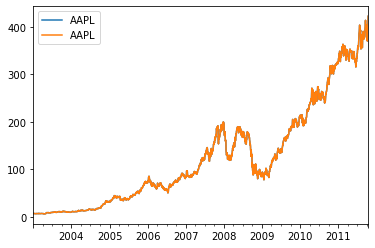

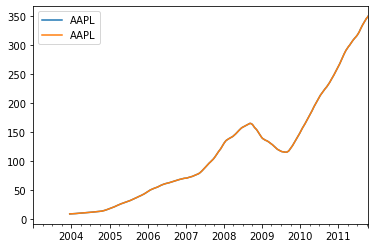

In [163]:
fig=plt.figure()
df1.AAPL.plot()
df1.AAPL.rolling(250).mean().plot()

In [167]:
appl=df1.AAPL.rolling(250,min_periods=10).std()
appl[5:12]


,AAPL,AAPL
2003-01-09,NaN,NaN
2003-01-10,NaN,NaN
2003-01-13,NaN,NaN
2003-01-14,NaN,NaN
2003-01-15,0.077496,0.077496
2003-01-16,0.074760,0.074760
2003-01-17,0.112368,0.112368


<AxesSubplot:>

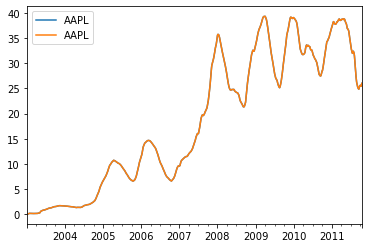

In [168]:
appl.plot()

<AxesSubplot:>

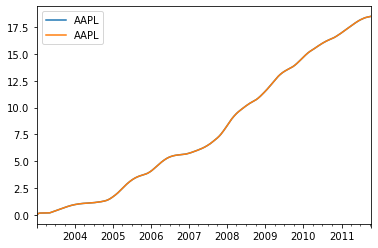

In [170]:
expanding_mean=appl.expanding().mean()
expanding_mean.plot()

<AxesSubplot:>

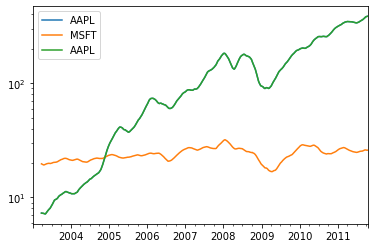

In [171]:
# calling a moving window function on a data frame
df1.rolling(60).mean().plot(logy=True)

In [172]:
df1.rolling('20D').mean()

,AAPL,MSFT,AAPL
2003-01-02,7.400000,21.110000,7.400000
2003-01-03,7.425000,21.125000,7.425000
2003-01-06,7.433333,21.256667,7.433333
2003-01-07,7.432500,21.425000,7.432500
2003-01-08,7.402000,21.402000,7.402000
...,...,...,...
2011-10-10,389.351429,25.602143,389.351429
2011-10-11,388.505000,25.674286,388.505000
2011-10-12,388.531429,25.810000,388.531429
2011-10-13,388.826429,25.961429,388.826429
